In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Numerov algorithm
Numberical estimation of eigen states of given hamiltonian.

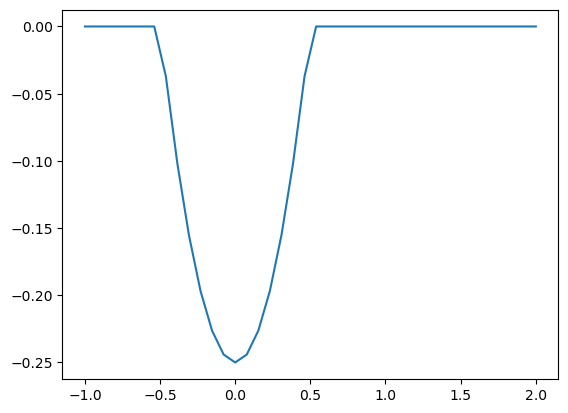

In [2]:
def pot_generator(c):
    def V(x):
        '''
        Potential shifted to the zero to be symmetric
        '''
        return np.minimum(0, c*((x+0.5)**2-(x+0.5)))
    return V
v = pot_generator(1)

x = np.linspace(-1, 2, 40)
y = v(x)
plt.plot(x, y)

In [3]:
def run_numerov(x, k, even):
    dx = x[1] - x[0]
    phi = np.zeros_like(x)
    if even:
        phi[0] = 1
        phi[1] = 1
    else:
        phi[1] = dx


    for i in range(1, len(phi)-1):
        # applying Numberov algorithm
        phi[i+1] = (2*phi[i]*(1-5*k[i]*dx**2/12)  - phi[i-1]*(1+k[i-1]*dx**2/12))/(1+k[i+1]*dx**2/12)
    
    return phi

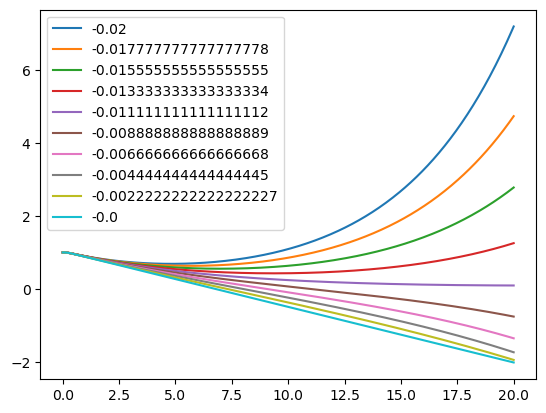

In [4]:
# def solve_odd()
c = 1
V = pot_generator(c)

N = 400
x = np.linspace(0, 20, N)
E = -0.5
for E in np.linspace(-0.02, -0.00, 10):
    # m = h = 1
    k = 2*(E - V(x))
    phi = run_numerov(x, k, even=True)
    
    plt.plot(x, phi, label=E)
plt.legend()
None

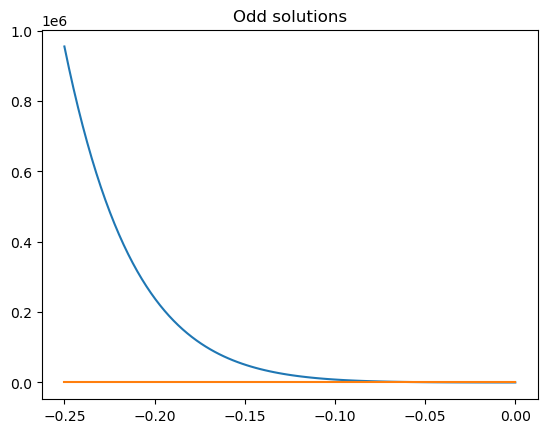

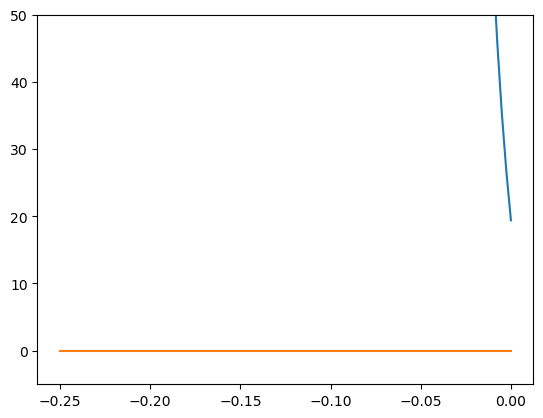

In [5]:
Es = np.linspace(0, -0.25, 100)
final_value = np.zeros_like(Es)
N = 400
x = np.linspace(0, 20, N)

for i, E in enumerate(Es):
    # m = h = 1
    k = 2*(E - V(x))
    phi = run_numerov(x, k, even=False)
    final_value[i] = phi[-1]

plt.title("Odd solutions")
plt.plot(Es, final_value)
plt.plot([Es.min(), Es.max()], [0, 0])
plt.show()
plt.plot(Es, final_value)
plt.plot([Es.min(), Es.max()], [0, 0])
plt.ylim(-5, 50)

None

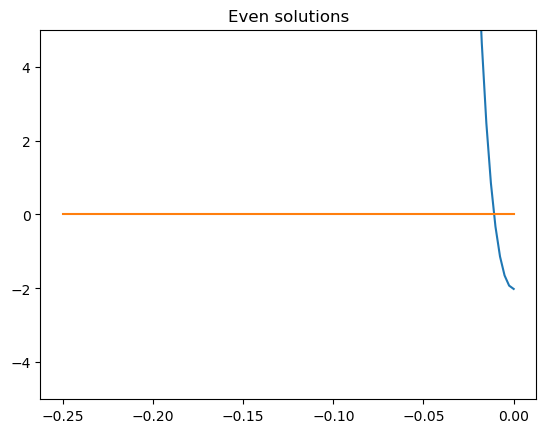

In [6]:
Es = np.linspace(0, -0.25, 100)
final_value = np.zeros_like(Es)
N = 400
x = np.linspace(0, 20, N)

for i, E in enumerate(Es):
    # m = h = 1
    k = 2*(E - V(x))
    phi = run_numerov(x, k, even=True)
    final_value[i] = phi[-1]
plt.title("Even solutions")
plt.plot(Es, final_value)
plt.plot([Es.min(), Es.max()], [0, 0])
plt.ylim(-5, 5)
None

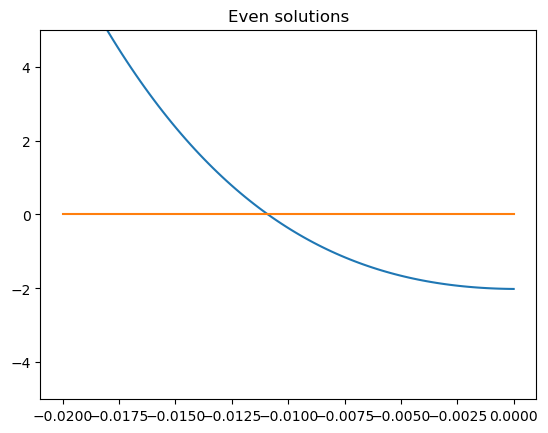

In [7]:
Es = np.linspace(0, -0.02, 100)
final_value = np.zeros_like(Es)
N = 400
x = np.linspace(0, 20, N)

for i, E in enumerate(Es):
    # m = h = 1
    k = 2*(E - V(x))
    phi = run_numerov(x, k, even=True)
    final_value[i] = phi[-1]
plt.title("Even solutions")
plt.plot(Es, final_value)
plt.plot([Es.min(), Es.max()], [0, 0])
plt.ylim(-5, 5)
None

I have found one root for even solutions, and no roots for odd solutions.

For positive energies it is possible to become zeros on such plots:

(-5.0, 5.0)

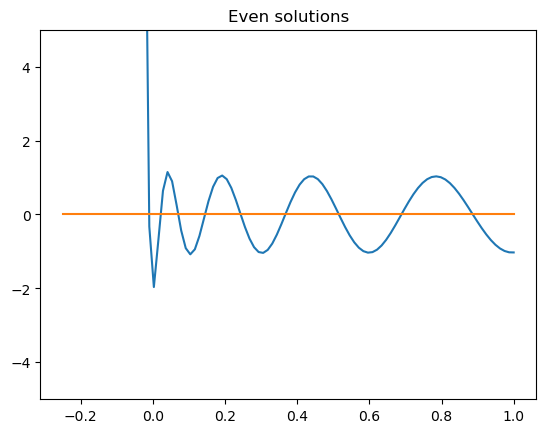

In [8]:
Es = np.linspace(1, -0.25, 100)
final_value = np.zeros_like(Es)
N = 400
x = np.linspace(0, 20, N)

for i, E in enumerate(Es):
    # m = h = 1
    k = 2*(E - V(x))
    phi = run_numerov(x, k, even=True)
    final_value[i] = phi[-1]
plt.title("Even solutions")
plt.plot(Es, final_value)
plt.plot([Es.min(), Es.max()], [0, 0])
plt.ylim(-5, 5)

But hey don't have physical meaning. These are solutions, that oscillate, when x->inf, so at some points they are zeros, but $\phi$ itself doesn't approach zero.

Text(0.5, 0.98, 'Found stable solution for E = -0.01 (c=1)')

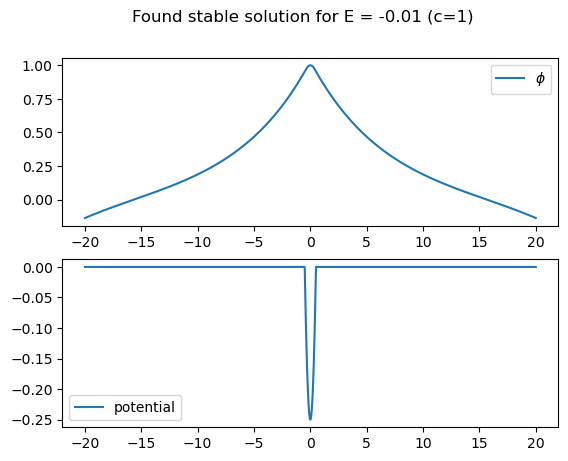

In [9]:
def plot_solution(E, even, V, x=None):
    if x is None:
        N = 800
        x = np.linspace(0, 20, N)
    k = 2*(E - V(x))
    phi = run_numerov(x, k, even=even)
    X = np.concatenate([-x[::-1], x])
    Phi = np.concatenate([phi[::-1]*(1 if even else -1), phi])
    plt.subplot(2, 1, 1)
    plt.plot(X, Phi, label="$\phi$")
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(X, V(X), label="potential")
    plt.legend()

plot_solution(-0.0115, True, V)
plt.suptitle("Found stable solution for E = -0.01 (c=1)")

Text(0.5, 0.98, 'Unstable solutions for positive energies')

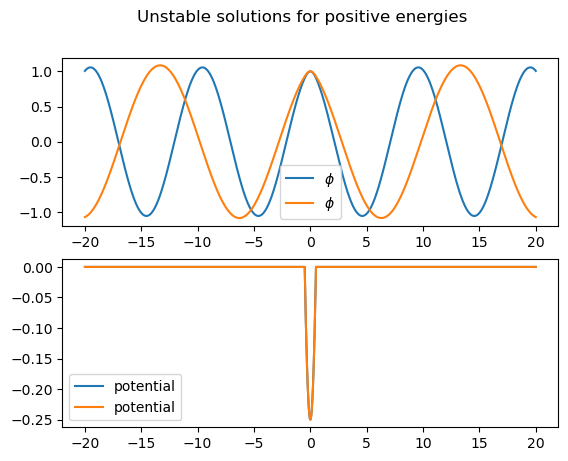

In [10]:
plot_solution(0.2, True, V)
plot_solution(0.1, True, V)
plt.suptitle("Unstable solutions for positive energies")

## C = 100

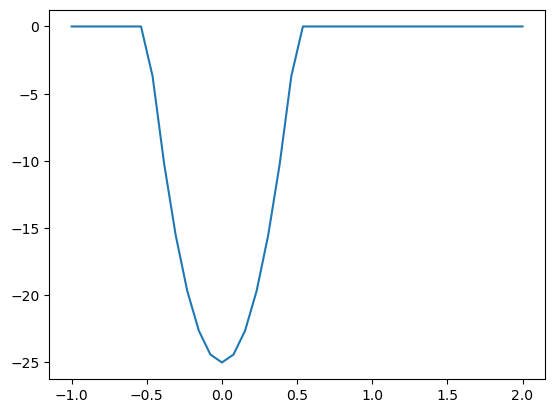

In [11]:
V = pot_generator(100)

x = np.linspace(-1, 2, 40)
y = V(x)
plt.plot(x, y)
minE = min(y)

Look for even eigenstates.

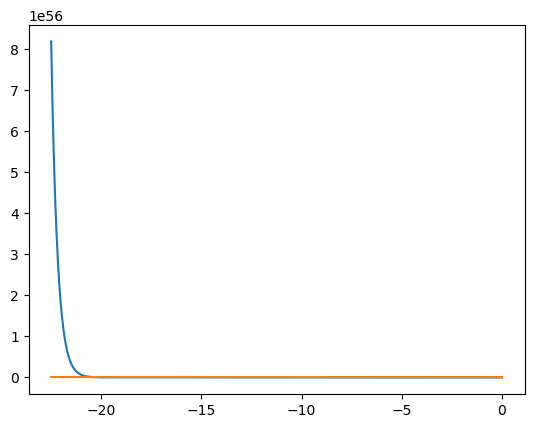

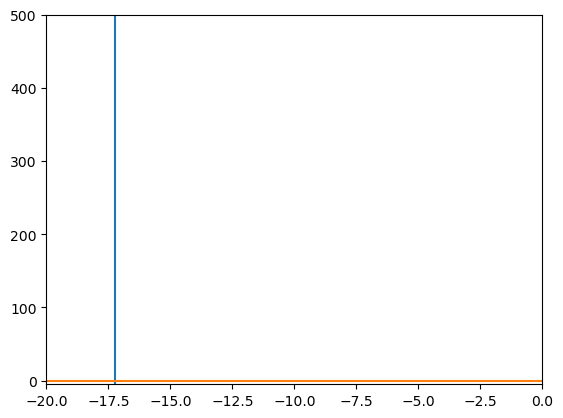

In [12]:
Es = np.linspace(0, minE*0.9, 1000)
final_value = np.zeros_like(Es)
N = 400
x = np.linspace(0, 20, N)

for i, E in enumerate(Es):
    # m = h = 1
    k = 2*(E - V(x))
    phi = run_numerov(x, k, even=True)
    final_value[i] = phi[-1]
plt.plot(Es, final_value)
plt.plot([Es.min(), Es.max()], [0, 0])
# plt.ylim(-5, 500)
plt.show()
plt.plot(Es, final_value)
plt.plot([Es.min(), Es.max()], [0, 0])
plt.ylim(-5, 500)
plt.xlim(-20, 0)
plt.show()


In [13]:
## automated root finding

def f(E):
    N = 400
    x = np.linspace(0, 3, N)
    # m = h = 1
    k = 2*(E - V(x))
    phi = run_numerov(x, k, even=True)
    final_value = phi[-1]
    return final_value
from scipy.optimize import root_scalar

sol = root_scalar(f, bracket=(minE, 0))
sol

      converged: True
           flag: 'converged'
 function_calls: 15
     iterations: 14
           root: -17.89037142679151

Text(0.5, 0.98, 'Found stable solution for E = -17.89037142679151 (c=100)')

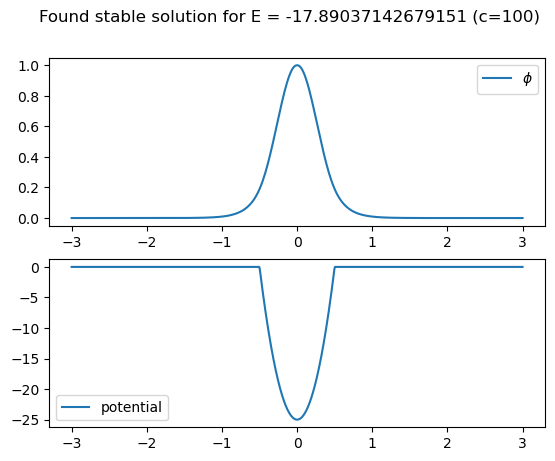

In [14]:
# plot_solution(sol.root, True, V)
plot_solution(sol.root, True, V, x=np.linspace(0, 3, 400))
plt.suptitle(f"Found stable solution for E = {sol.root} (c=100)")

### odd solutions

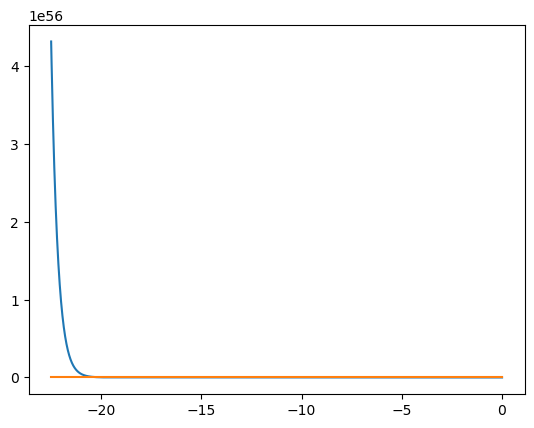

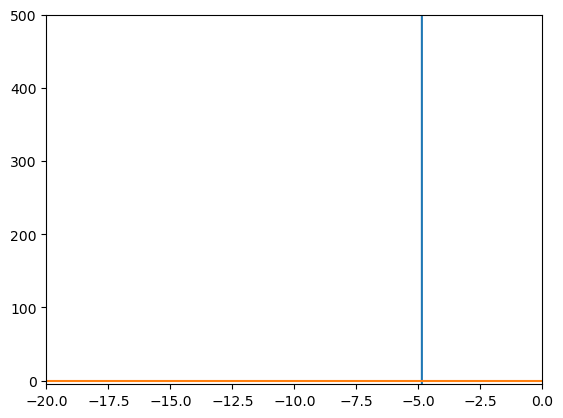

In [15]:
Es = np.linspace(0, minE*0.9, 1000)
final_value = np.zeros_like(Es)
N = 400
x = np.linspace(0, 20, N)

for i, E in enumerate(Es):
    # m = h = 1
    k = 2*(E - V(x))
    phi = run_numerov(x, k, even=False)
    final_value[i] = phi[-1]
plt.plot(Es, final_value)
plt.plot([Es.min(), Es.max()], [0, 0])
# plt.ylim(-5, 500)
plt.show()
plt.plot(Es, final_value)
plt.plot([Es.min(), Es.max()], [0, 0])
plt.ylim(-5, 500)
plt.xlim(-20, 0)
plt.show()

In [16]:
## automated root finding

def f(E):
    N = 400
    x = np.linspace(0, 3, N)
    # m = h = 1
    k = 2*(E - V(x))
    phi = run_numerov(x, k, even=False)
    final_value = phi[-1]
    return final_value
from scipy.optimize import root_scalar

sol = root_scalar(f, bracket=(minE, 0))
sol

      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 15
           root: -4.877389373555627

In [17]:
f(sol.root)

-4.766097760156998e-11

Text(0.5, 0.98, 'Found stable solution for E = -4.877389373555627 (c=100)')

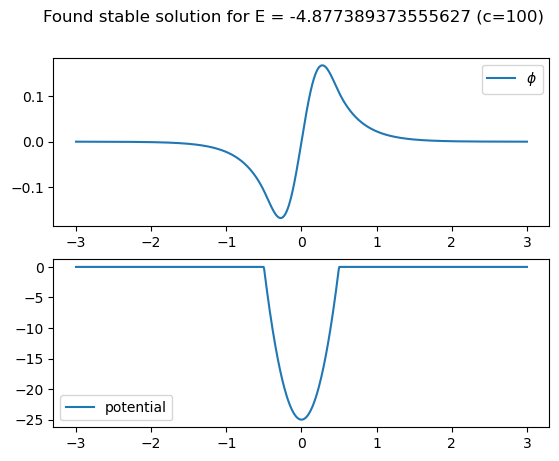

In [18]:
plot_solution(sol.root, False, V, x=np.linspace(0, 3, 400))
plt.suptitle(f"Found stable solution for E = {sol.root} (c=100)")

In [19]:
def full_automated_numerov(V, max_x, even):
    
    N = 400
    x = np.linspace(0, max_x, N)
    def f(E):
        # m = h = 1
        k = 2*(E - V(x))
        phi = run_numerov(x, k, even=even)
        final_value = phi[-1]
        return final_value

    sol = root_scalar(f, bracket=(minE, 0))
    plot_solution(sol.root, even, V, x=x)
    plt.suptitle(f"Found stable solution for E = {sol.root}")

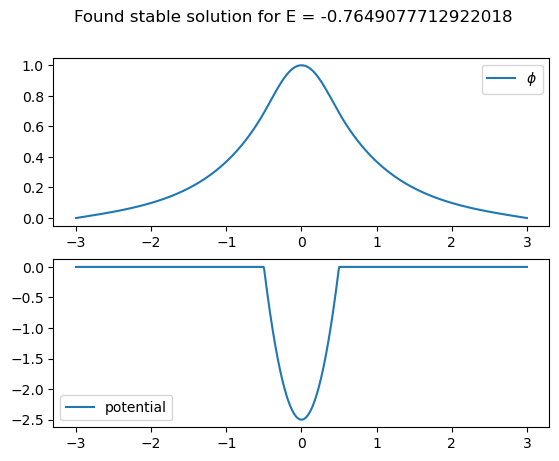

ValueError: f(a) and f(b) must have different signs

In [20]:
V = pot_generator(10)
full_automated_numerov(V, 3, True)
plt.show()
full_automated_numerov(V, 3, False)
plt.show()

So for C = 10 there are also no odd solution. Only one even.

But finally algorithm works without manual adjustment.

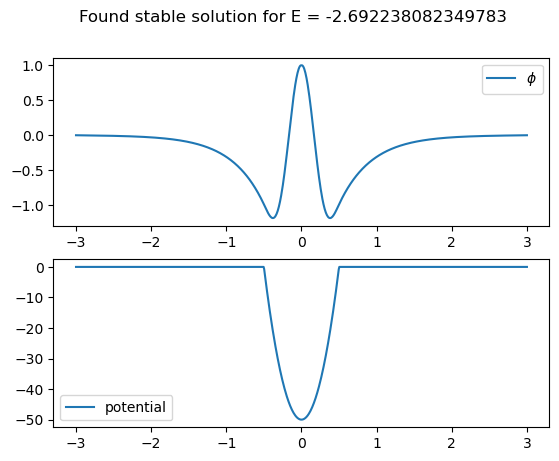

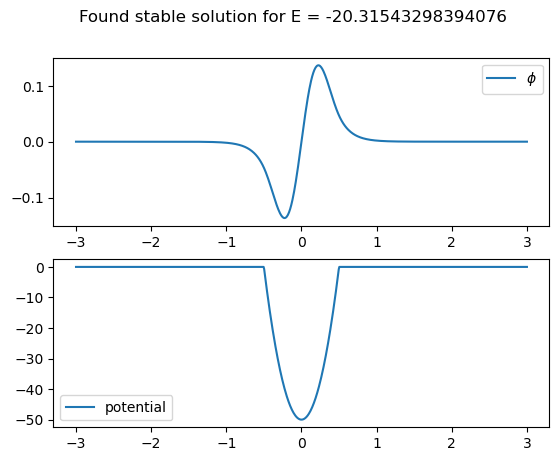

In [ ]:
V = pot_generator(200)
full_automated_numerov(V, 3, True)
plt.show()
full_automated_numerov(V, 3, False)
plt.show()

And for C = 200 a bit more interesting solutions for both odd and even cases.